In [1]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import calc_metrics
from main import print_statistics_report
from main import save_report_to_excel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 17, 11, 3, 4, 5, 6, 15],
    'platform': [
        'android',
        'android',
        'android',
        'ios',
        'ios',
        'ios',
        'android',
        'android',
        'android',
        'ios',
        'ios',
    ],
    'dt': [
        '2021-01-01', 
        '2021-01-02', 
        '2021-01-01', 
        '2021-01-02', 
        '2021-01-02',
        '2021-01-04', 
        '2021-01-03', 
        '2021-01-02', 
        '2021-01-05', 
        '2021-01-01',
        '2021-01-04'
    ],
    'group': [2, 1, 1, 2, 1,2, 2, 2, 1, 3, 3],
    'payment': [np.nan, 100, np.nan, np.nan, 110, 210, np.nan, 50, np.nan, 130, 15],
    'clicks': [0, 11, 2, 11, 6, 9, 1, 4, 0, 15, 7]
})

In [4]:
exp_df.describe()

,user_id,group,payment,clicks
count,11.000000,11.000000,6.000000,11.00000
mean,6.181818,1.818182,102.500000,6.00000
std,5.618152,0.750757,67.509259,5.07937
min,1.000000,1.000000,15.000000,0.00000
25%,2.500000,1.000000,62.500000,1.50000
50%,4.000000,2.000000,105.000000,6.00000
75%,8.500000,2.000000,125.000000,10.00000
max,17.000000,3.000000,210.000000,15.00000


In [5]:
exp_df.groupby('dt').describe()

user_id                                                 group       \
             count   mean       std   min   25%   50%    75%   max count mean   
dt                                                                              
2021-01-01     3.0   3.00  2.645751   1.0   1.5   2.0   4.00   6.0   3.0  2.0   
2021-01-02     4.0   6.25  7.274384   1.0   2.5   3.5   7.25  17.0   4.0  1.5   
2021-01-03     1.0   3.00       NaN   3.0   3.0   3.0   3.00   3.0   1.0  2.0   
2021-01-04     2.0  13.00  2.828427  11.0  12.0  13.0  14.00  15.0   2.0  2.5   
2021-01-05     1.0   5.00       NaN   5.0   5.0   5.0   5.00   5.0   1.0  1.0   

            ... payment        clicks                                     \
            ...     75%    max  count      mean       std  min  25%  50%   
dt          ...                                                            
2021-01-01  ...  130.00  130.0    3.0  5.666667  8.144528  0.0  1.0  2.0   
2021-01-02  ...  105.00  110.0    4.0  8.000000  3.559026  4.0  5.5  8.5   
2021-01-03  ...     NaN    NaN    1.0  1.000000       NaN  1.0  1.0  1.0   
2021-01-04  ...  161.25  210.0    2.0  8.000000  1.414214  7.0  7.5  8.0   
2021-01-05  ...     NaN    NaN    1.0  0.000000       NaN  0.0  0.0  0.0   

                        
             75%   max  
dt                      
2021-01-01   8.5  15.0  
2021-01-02  11.0  11.0  
2021-01-03   1.0   1.0  
2021-01-04   8.5   9.0  
2021-01-05   0.0   0.0  

[5 rows x 32 columns]

In [6]:
exp_df.groupby('platform').describe()

user_id                                                    group  \
           count       mean       std  min   25%   50%    75%   max count   
platform                                                                    
android      6.0   2.666667  1.632993  1.0  1.25   2.5   3.75   5.0   6.0   
ios          5.0  10.400000  5.899152  3.0  6.00  11.0  15.00  17.0   5.0   

               ... payment        clicks                                       \
         mean  ...     75%    max  count mean       std  min   25%  50%   75%   
platform       ...                                                              
android   1.5  ...    87.5  100.0    6.0  3.0  4.195235  0.0  0.25  1.5   3.5   
ios       2.2  ...   150.0  210.0    5.0  9.6  3.577709  6.0  7.00  9.0  11.0   

                
           max  
platform        
android   11.0  
ios       15.0  

[2 rows x 32 columns]

In [7]:
m = set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    abgroup_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name=1,
    significance_level=0.05,
    aggregations=[
        '*',
        'platform'
    ]
)

In [8]:
validate_ab_test_data(EXPERIMENT_NAME)

# Aggregation *

group                   1           2           3
user_id count    4.000000    5.000000    2.000000
        mean     6.250000    4.400000   10.500000
        std      7.365460    3.847077    6.363961
        min      1.000000    1.000000    6.000000
        25%      1.750000    3.000000    8.250000
        50%      3.500000    3.000000   10.500000
        75%      8.000000    4.000000   12.750000
        max     17.000000   11.000000   15.000000
payment count    2.000000    2.000000    2.000000
        mean   105.000000  130.000000   72.500000
        std      7.071068  113.137085   81.317280
        min    100.000000   50.000000   15.000000
        25%    102.500000   90.000000   43.750000
        50%    105.000000  130.000000   72.500000
        75%    107.500000  170.000000  101.250000
        max    110.000000  210.000000  130.000000
clicks  count    4.000000    5.000000    2.000000
        mean     4.750000    5.000000   11.000000
        std      4.856267    4.847680    5.656854
        min      0.000000    0.000000    7.000000
        25%      1.500000    1.000000    9.000000
        50%      4.000000    4.000000   11.000000
        75%      7.250000    9.000000   13.000000
        max     11.000000   11.000000   15.000000

,group,user_id
0,1,8
1,2,1


# Aggregation platform

group                   1          2
user_id count    3.000000   3.000000
        mean     2.666667   2.666667
        std      2.081666   1.527525
        min      1.000000   1.000000
        25%      1.500000   2.000000
        50%      2.000000   3.000000
        75%      3.500000   3.500000
        max      5.000000   4.000000
payment count    1.000000   1.000000
        mean   100.000000  50.000000
        std           NaN        NaN
        min    100.000000  50.000000
        25%    100.000000  50.000000
        50%    100.000000  50.000000
        75%    100.000000  50.000000
        max    100.000000  50.000000
clicks  count    3.000000   3.000000
        mean     4.333333   1.666667
        std      5.859465   2.081666
        min      0.000000   0.000000
        25%      1.000000   0.500000
        50%      2.000000   1.000000
        75%      6.500000   2.500000
        max     11.000000   4.000000

,group,user_id
0,1,4
1,2,1


# Aggregation platform

group              1           2           3
user_id count    1.0    2.000000    2.000000
        mean    17.0    7.000000   10.500000
        std      NaN    5.656854    6.363961
        min     17.0    3.000000    6.000000
        25%     17.0    5.000000    8.250000
        50%     17.0    7.000000   10.500000
        75%     17.0    9.000000   12.750000
        max     17.0   11.000000   15.000000
payment count    1.0    1.000000    2.000000
        mean   110.0  210.000000   72.500000
        std      NaN         NaN   81.317280
        min    110.0  210.000000   15.000000
        25%    110.0  210.000000   43.750000
        50%    110.0  210.000000   72.500000
        75%    110.0  210.000000  101.250000
        max    110.0  210.000000  130.000000
clicks  count    1.0    2.000000    2.000000
        mean     6.0   10.000000   11.000000
        std      NaN    1.414214    5.656854
        min      6.0    9.000000    7.000000
        25%      6.0    9.500000    9.000000
        50%      6.0   10.000000   11.000000
        75%      6.0   10.500000   13.000000
        max      6.0   11.000000   15.000000

,group,user_id
0,1,5


# Aggregation: Whole dataset

### Metrics conversion to purchase

,1,2,3,2-1,3-1,2-1 pvalue,3-1 pvalue
metric,50.00%,40.00%,100.00%,-20.00%,+100.00%,0.764177,0.220671


### Period chart conversion to purchase

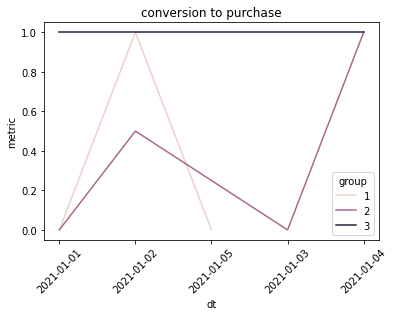

### Pvalue By timeseries conversion to purchase

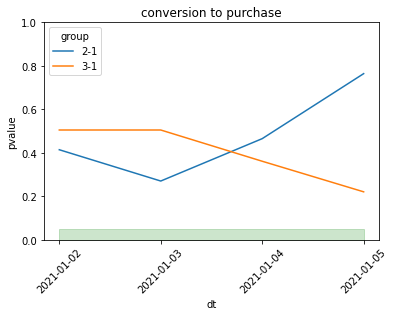

# Aggregation: platform = android

### Metrics conversion to purchase

,1,2,2-1,2-1 pvalue
metric,33.33%,33.33%,+0.00%,1.0


### Period chart conversion to purchase

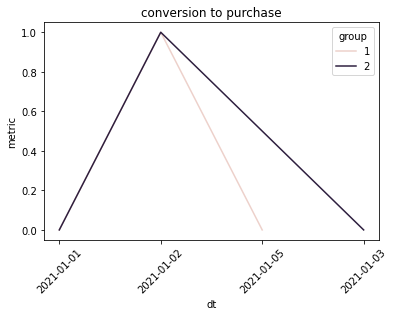

### Pvalue By timeseries conversion to purchase

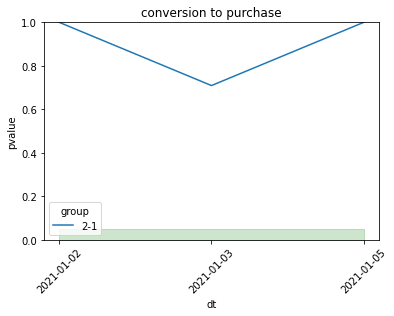

In [10]:
calc_metrics(
    EXPERIMENT_NAME,
    nominator_col='payment',
    denominator_col='user_id',
    name='conversion to purchase',
    is_uniq_id_proportions=True,
    hypothesis={
        'stat_test': 'chisquare',
        'significance_level': 0.05
    },
    aggregation_values={
        '*': '*',
        'platform': ['android'],
        # ['platform', 'browser']: [['android', 'chrome']]
    }
)

# Aggregation: Whole dataset

### Metrics CTR

,1,2,3,2-1,3-1,2-1 pvalue,3-1 pvalue
metric,76.00%,113.64%,104.76%,+49.52%,+37.84%,0.0,0.001798


### Period chart CTR

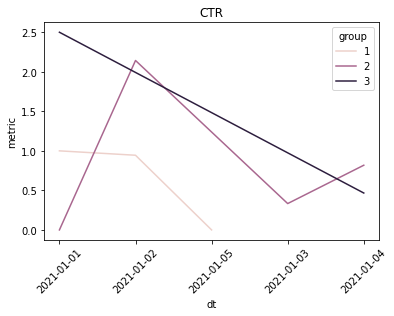

### Pvalue By timeseries CTR

c:\imp\python391\lib\site-packages\scipy\stats\stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


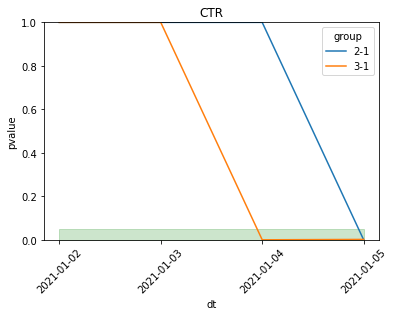

In [11]:
calc_metrics(
    EXPERIMENT_NAME,
    nominator_col='clicks',
    denominator_col='user_id',
    name='CTR',
    is_uniq_id_proportions=False,
    hypothesis={
        'stat_test': 'chisquare',
        'significance_level': 0.05
    },
    aggregation_values={
        '*': '*',
        # ['platform', 'browser']: [['android', 'chrome']]
    }
)

# Aggregation: platform = ios

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 2-1'

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 3-1'

### Metrics ARPU (USD after fee)

,1,2,3,2-1,3-1,2-1 pvalue,3-1 pvalue
metric,110.000,210.000,145.000,+90.91%,+31.82%,NaN,NaN


### Period chart ARPU (USD after fee)

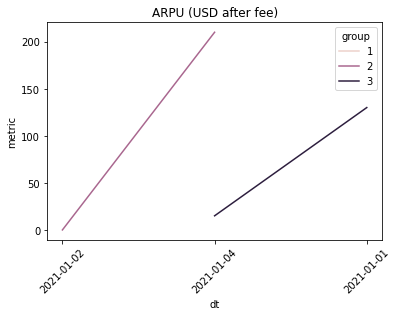

### Pvalue By timeseries ARPU (USD after fee)

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 2-1'

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 3-1'

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 2-1'

'not enough data to test "ARPU (USD after fee) payment" hypothesis in groups 3-1'

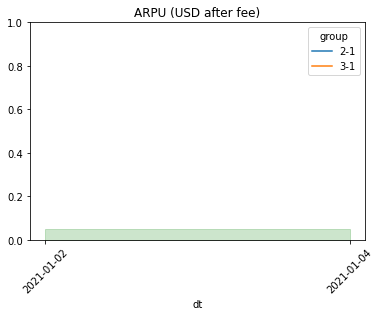

In [12]:
calc_metrics(
    EXPERIMENT_NAME,
    name='ARPU (USD after fee)',
    continuous_measure_col='payment',
    aggregation_values={
        'platform': ['ios'],
        # ['platform', 'browser']: [['android', 'chrome']]
    },
    hypothesis={
        'stat_test': 'ttest_welsh',
        'significance_level': 0.05
    }
)

# Aggregation: platform = ios

'not enough data to test "ARPU (USD after fee) - quantile 0.98 payment" hypothesis in groups 2-1'

'not enough data to test "ARPU (USD after fee) - quantile 0.98 payment" hypothesis in groups 3-1'

### Metrics ARPU (USD after fee) - quantile 0.98

,1,2,3,2-1,3-1,2-1 pvalue,3-1 pvalue
metric,110.000,0.000,145.000,-100.00%,+31.82%,NaN,NaN


### Period chart ARPU (USD after fee) - quantile 0.98

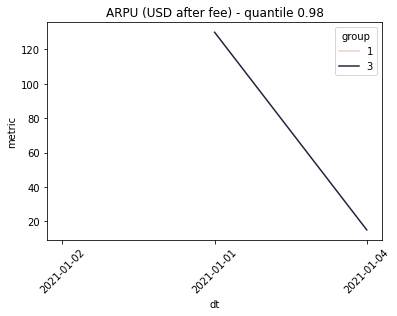

### Distribution chart ARPU (USD after fee) - quantile 0.98

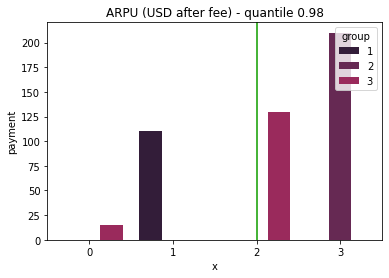

### Pvalue By timeseries ARPU (USD after fee) - quantile 0.98

,payment
group,
1,110.0


KeyError: "None of [Index(['pvalue'], dtype='object')] are in the [columns]"

In [18]:
calc_metrics(
    EXPERIMENT_NAME,
    name='ARPU (USD after fee) - quantile 0.98',
    continuous_measure_col='payment',
    outliers='metrics data', # None, 'groups', 'metrics data'
    outliers_quantile=0.98,
    outliers_quantile_min_value=0,
    aggregation_values={
        'platform': ['ios'],
        # ['platform', 'browser']: [['android', 'chrome']]
    },
    hypothesis={
        'stat_test': 'ttest_welsh',
        'significance_level': 0.05
    }
)

In [ ]:
print_statistics_report(EXPERIMENT_NAME)

In [ ]:
save_report_to_excel(EXPERIMENT_NAME, 'example.xlsx')